In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [7]:
#决策树的简单使用
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 2.]])

array([1])

In [8]:
#决策树实例
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

In [9]:
path = ('iris.data')
data = pd.read_csv(path, header=None)
category = []
for i in range(len(data[4])):
    category.append(iris_type(data[4][i]))
data[4] = category
print(data)

       0    1    2    3  4
0    5.1  3.5  1.4  0.2  0
1    4.9  3.0  1.4  0.2  0
2    4.7  3.2  1.3  0.2  0
3    4.6  3.1  1.5  0.2  0
4    5.0  3.6  1.4  0.2  0
5    5.4  3.9  1.7  0.4  0
6    4.6  3.4  1.4  0.3  0
7    5.0  3.4  1.5  0.2  0
8    4.4  2.9  1.4  0.2  0
9    4.9  3.1  1.5  0.1  0
10   5.4  3.7  1.5  0.2  0
11   4.8  3.4  1.6  0.2  0
12   4.8  3.0  1.4  0.1  0
13   4.3  3.0  1.1  0.1  0
14   5.8  4.0  1.2  0.2  0
15   5.7  4.4  1.5  0.4  0
16   5.4  3.9  1.3  0.4  0
17   5.1  3.5  1.4  0.3  0
18   5.7  3.8  1.7  0.3  0
19   5.1  3.8  1.5  0.3  0
20   5.4  3.4  1.7  0.2  0
21   5.1  3.7  1.5  0.4  0
22   4.6  3.6  1.0  0.2  0
23   5.1  3.3  1.7  0.5  0
24   4.8  3.4  1.9  0.2  0
25   5.0  3.0  1.6  0.2  0
26   5.0  3.4  1.6  0.4  0
27   5.2  3.5  1.5  0.2  0
28   5.2  3.4  1.4  0.2  0
29   4.7  3.2  1.6  0.2  0
..   ...  ...  ...  ... ..
120  6.9  3.2  5.7  2.3  2
121  5.6  2.8  4.9  2.0  2
122  7.7  2.8  6.7  2.0  2
123  6.3  2.7  4.9  1.8  2
124  6.7  3.3  5.7  2.1  2
1

In [11]:
x, y = np.split(data.values, (4,), axis=1)
x = x[:,:2]
# 决策树参数估计
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，则完成分支；否则，不进行分支
clf = clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
#y.ravel()是将y变成一行
dt_clf = clf.fit(x, y.ravel())
f = open("iris_tree.dot", 'w')
tree.export_graphviz(dt_clf, out_file=f)
f.close()

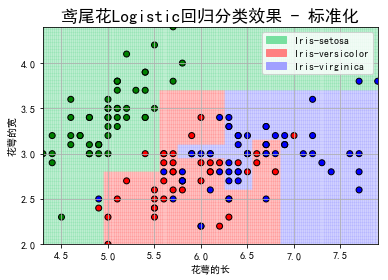

In [12]:
#画图
#横纵采样各多少个值
N, M = 500, 500
#第0列的最小（大）值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
#第1列的最小（大）值
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
#生成网格采样点
x1, x2 = np.meshgrid(t1, t2)
#先分别将x1和x2摊平（x1.flat是摊平的意思），然后将一维堆成二维
x_test = np.stack((x1.flat, x2.flat), axis=1)
y_hat = dt_clf.predict(x_test)
#使之与输入的形状相同
y_hat = y_hat.reshape(x1.shape)

plt.figure(facecolor='w')
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g','r','b'])
#绘制预测分类图
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light, alpha=0.1)
#绘制真实散点图
plt.scatter(x[:, 0],x[:, 1], c=y.flat, edgecolors='k', cmap=cm_dark)
#以下两句解决中文标签不能显示的问题
plt.rcParams['font.sans-serif'] = ['simHei']
plt.rcParams['axes.unicode_minus'] = False
#设置标签
plt.xlabel('花萼的长')
plt.ylabel('花萼的宽')
#设置坐标上下限
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
          mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
          mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
plt.title('鸢尾花Logistic回归分类效果 - 标准化', fontsize=17)
plt.show()

In [13]:
#训练集上的预测结果
y_hat = dt_clf.predict(x)
y = y.reshape(-1)
print(y_hat.shape, y.shape)
c = np.count_nonzero(y_hat == y)
accuracy = 100*(float(c)/float(len(y)))
print("预测准确度为%.2f%%"%round(accuracy,2))

(150,) (150,)
预测准确度为82.00%
